In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
%matplotlib inline

df = pd.read_excel("NIPS_CONF_RAW.xlsx",
                   na_values="...")
df.head()
print (len(df))

3848


In [3]:
df.head()

,Conf,Year,Title,Num,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,Author_7,Author_8,Author_9,Author_10,Author_11,Author_12,Author_13
0,NIPS,2016,Scan Order in Gibbs Sampling Models in Which i...,4,Bryan D. He,Christopher M. De Sa,Ioannis Mitliagkas,Christopher Re,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NIPS,2016,Deep ADMM-Net for Compressive Sensing MRI,4,yan yang,Jian Sun,Huibin Li,Zongben Xu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NIPS,2016,A scaled Bregman theorem with applications,3,Richard Nock,Aditya Menon,Cheng Soon Ong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NIPS,2016,Swapout Learning an ensemble of deep architect...,3,Saurabh Singh,Derek Hoiem,David Forsyth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NIPS,2016,On Regularizing Rademacher Observation Losses,1,Richard Nock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
conf = 'NIPS'
year = 2016
list_year = range(2005, 2017)
replace_data = [':','?','for', 'a','an' ,'in', 'of', 'with', 'and', 'the', 
                'to', 'on', 'from', 'by', 'using', 'very', 'via', 'it', 'that']


title_list = df[(df['Conf']==conf)&(df['Year']==year)].Title.str.lower()


#print (title_list[0])
title_list = title_list.str.replace(':', '')
title_list = title_list.str.replace('?', '')
#print (title_list[0])

title_words = [a.split() for a in title_list]

counter = Counter(chain.from_iterable(title_words))

words_set = pd.DataFrame.from_dict(counter, orient='index').reset_index()
words_set = words_set.rename(columns={'index':'words', 0:'count'})
words_set = words_set.sort(['count'], ascending=False)
#print (len(words_set))
words_set = words_set[~words_set['words'].isin(replace_data)]
words_set = words_set.reset_index()
words_set = words_set.drop('index',1)

df_y_2016 = words_set

#print (title_words)

print (title_words[0])

for i in range(len(title_words)):
    title_words[i] = [x for x in title_words[i] if x not in replace_data ]

#title_words.remove(replace_data)
print (title_words[0])
title_df = pd.DataFrame(title_words)

print (len(words_set))
#print (words_set)
print (title_df.head())
print (len(title_df))

[u'scan', u'order', u'in', u'gibbs', u'sampling', u'models', u'in', u'which', u'it', u'matters', u'and', u'bounds', u'on', u'how', u'much']
[u'scan', u'order', u'gibbs', u'sampling', u'models', u'which', u'matters', u'bounds', u'how', u'much']
1461
             0           1            2             3              4      5   \
0          scan       order        gibbs      sampling         models  which   
1          deep    admm-net  compressive       sensing            mri   None   
2        scaled     bregman      theorem  applications           None   None   
3       swapout    learning     ensemble          deep  architectures   None   
4  regularizing  rademacher  observation        losses           None   None   

        6       7     8     9     10    11  
0  matters  bounds   how  much  None  None  
1     None    None  None  None  None  None  
2     None    None  None  None  None  None  
3     None    None  None  None  None  None  
4     None    None  None  None  None  None  


/Users/noahjung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
concat_df = pd.concat([df,title_df ], axis=1)
concat_df.ix[:20]

,Conf,Year,Title,Num,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,...,2,3,4,5,6,7,8,9,10,11
0,NIPS,2016,Scan Order in Gibbs Sampling Models in Which i...,4,Bryan D. He,Christopher M. De Sa,Ioannis Mitliagkas,Christopher Re,NaN,NaN,...,gibbs,sampling,models,which,matters,bounds,how,much,None,None
1,NIPS,2016,Deep ADMM-Net for Compressive Sensing MRI,4,yan yang,Jian Sun,Huibin Li,Zongben Xu,NaN,NaN,...,compressive,sensing,mri,None,None,None,None,None,None,None
2,NIPS,2016,A scaled Bregman theorem with applications,3,Richard Nock,Aditya Menon,Cheng Soon Ong,NaN,NaN,NaN,...,theorem,applications,None,None,None,None,None,None,None,None
3,NIPS,2016,Swapout Learning an ensemble of deep architect...,3,Saurabh Singh,Derek Hoiem,David Forsyth,NaN,NaN,NaN,...,ensemble,deep,architectures,None,None,None,None,None,None,None
4,NIPS,2016,On Regularizing Rademacher Observation Losses,1,Richard Nock,NaN,NaN,NaN,NaN,NaN,...,observation,losses,None,None,None,None,None,None,None,None
5,NIPS,2016,Without-Replacement Sampling for Stochastic Gr...,1,Ohad Shamir,NaN,NaN,NaN,NaN,NaN,...,stochastic,gradient,methods,None,None,None,None,None,None,None
6,NIPS,2016,Fast and Provably Good Seedings for k-Means,4,Olivier Bachem,Mario Lucic,Hamed Hassani,Andreas Krause,NaN,NaN,...,good,seedings,k-means,None,None,None,None,None,None,None
7,NIPS,2016,Unsupervised Learning for Physical Interaction...,3,Chelsea Finn,Ian Goodfellow,Sergey Levine,NaN,NaN,NaN,...,physical,interaction,through,video,prediction,None,None,None,None,None
8,NIPS,2016,High-Rank Matrix Completion and Clustering und...,1,Ehsan Elhamifar,NaN,NaN,NaN,NaN,NaN,...,completion,clustering,under,self-expressive,models,None,None,None,None,None
9,NIPS,2016,Learning a Probabilistic Latent Space of Objec...,5,Jiajun Wu,Chengkai Zhang,Tianfan Xue,Bill Freeman,Josh Tenenbaum,NaN,...,latent,space,object,shapes,3d,generative-adversarial,modeling,None,None,None


In [6]:
list_year = range(2005, 2017)

for i in range(len(list_year)):
    
    year = list_year[i]
    title_list = df[(df['Conf']==conf)&(df['Year']==year)].Title.str.lower()


    #print (title_list[0])
    title_list = title_list.str.replace(':', '')
    title_list = title_list.str.replace('?', '')
    #print (title_list[0])

    title_words = [a.split() for a in title_list]

    counter = Counter(chain.from_iterable(title_words))

    words_set = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    col_name = 'count_'+str(year)
    words_set = words_set.rename(columns={'index':'words', 0:col_name})
    words_set = words_set.sort([col_name], ascending=False)
    print (len(words_set))
    words_set = words_set[~words_set['words'].isin(replace_data)]
    words_set = words_set.reset_index()
    words_set = words_set.drop('index',1)
    
    if i == 0 :
        df_y_2005 = words_set
    if i == 1 :
        df_y_2006 = words_set
    if i == 2 :
        df_y_2007 = words_set
    if i == 3 :
        df_y_2008 = words_set
    if i == 4 :
        df_y_2009 = words_set
    if i == 5 :
        df_y_2010 = words_set
    if i == 6 :
        df_y_2011 = words_set
    if i == 7 :
        df_y_2012 = words_set
    if i == 8 :
        df_y_2013 = words_set
    if i == 9 :
        df_y_2014 = words_set
    if i == 10 :
        df_y_2015 = words_set
    if i == 11 :
        df_y_2016 = words_set
        
        
#print (len(words_set))
#print (words_set)

725
665
730
844
851
953
915
1077
1082
1115
1120
1477


/Users/noahjung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [8]:
## make List of DF 
dfs = [df_y_2005,df_y_2006,df_y_2007, df_y_2008, df_y_2009, 
       df_y_2010, df_y_2011, df_y_2012, df_y_2013, df_y_2014, df_y_2015, df_y_2016]


In [9]:
df_final = reduce(lambda left, right: pd.merge(left, right, on='words', how='outer'), dfs)

df_final = df_final.set_index(['words'])
df_final.head()

,count_2005,count_2006,count_2007,count_2008,count_2009,count_2010,count_2011,count_2012,count_2013,count_2014,count_2015,count_2016
words,,,,,,,,,,,,
learning,40.0,42.0,47.0,53.0,60.0,63.0,79.0,92.0,78.0,86.0,79.0,126.0
models,16.0,15.0,14.0,22.0,24.0,20.0,25.0,32.0,32.0,41.0,35.0,42.0
gaussian,14.0,8.0,6.0,10.0,7.0,8.0,13.0,13.0,13.0,15.0,12.0,10.0
analysis,13.0,7.0,15.0,11.0,14.0,12.0,13.0,11.0,7.0,13.0,15.0,12.0
visual,10.0,5.0,4.0,4.0,6.0,5.0,5.0,6.0,6.0,3.0,3.0,8.0


([<matplotlib.axis.XTick at 0x115b5f7d0>,
 <a list of 12 Text xticklabel objects>)

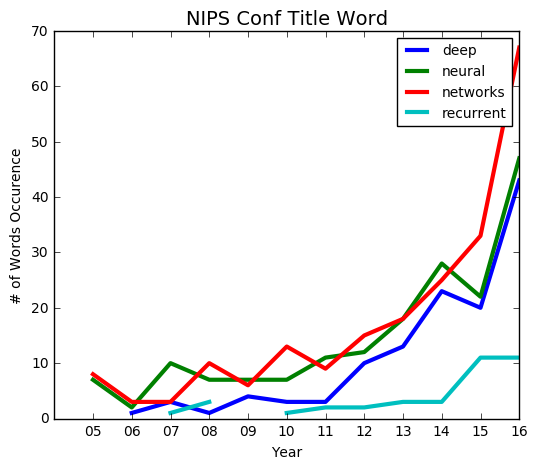

In [10]:
fig = plt.figure(figsize=(6, 5))
list_name = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
chk_keywords = ['deep', 
                'neural', 'networks', 'recurrent'] 

for i in range(len(chk_keywords)):
    values = (df_final.ix[[chk_keywords[i]]].values)
    plt.subplot(1,1,1)
    plt.plot(list_year, values[0], '-', linewidth=3.0)

plt.xlabel('Year')
plt.ylabel("# of Words Occurence")
text_legend_line = conf+' Conf Title Word'
plt.title(text_legend_line, size=14)
plt.legend(labels =chk_keywords, fontsize=10)
plt.xticks(list_year, list_name, fontsize=10,color='black')


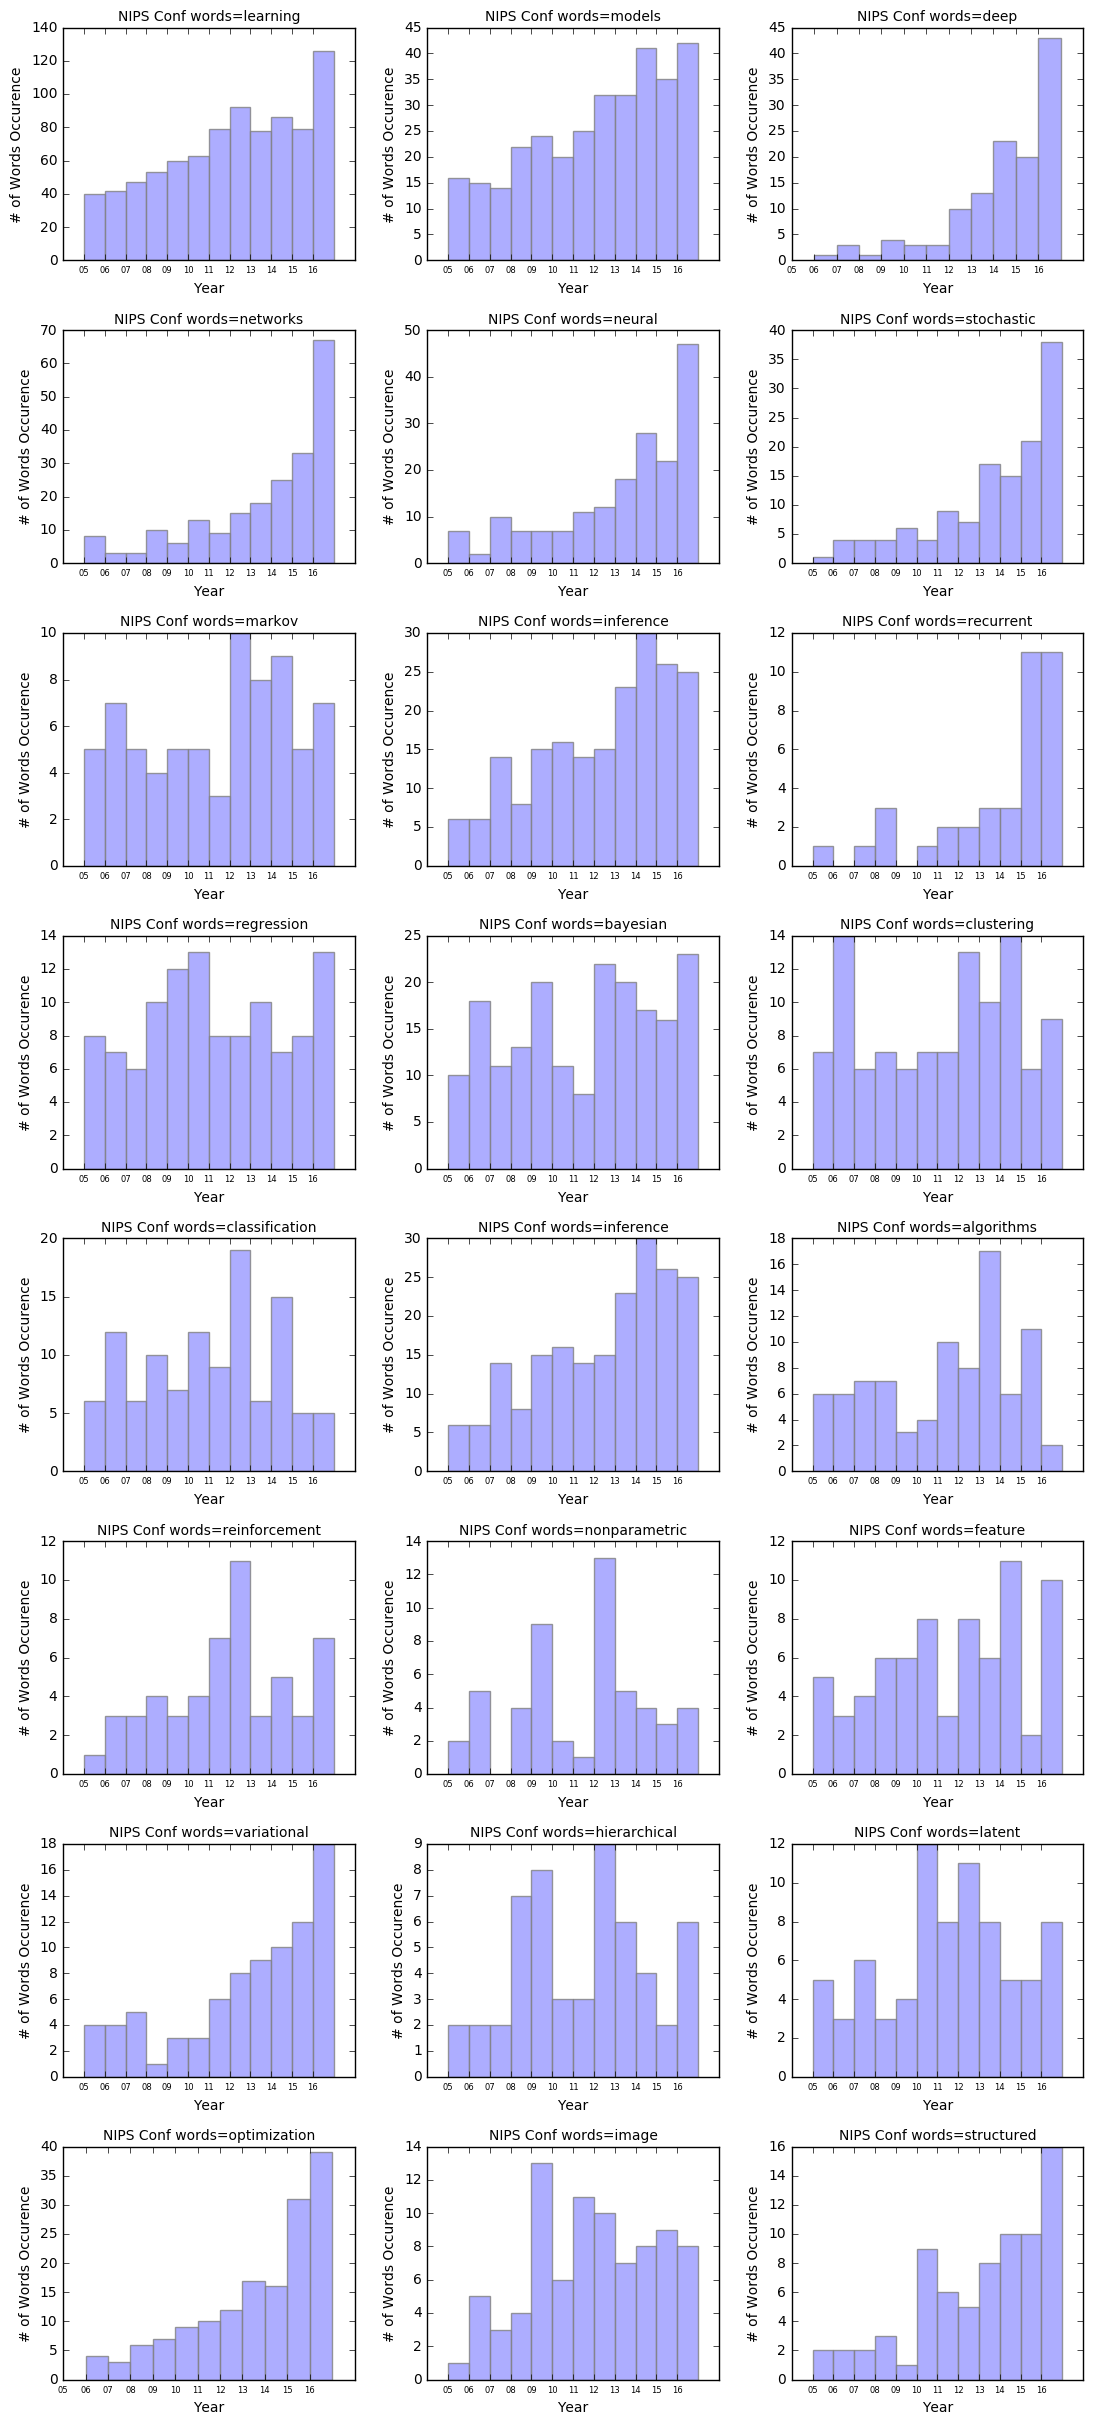

In [11]:
fig = plt.figure(figsize=(12, 28))
#values = df_final[(df_final['words']=='learning')]
#df_final.reset_index(level=0, inplace=True)
list_name = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']

chk_keywords = [
                'learning', 'models', 'deep', 
                'networks', 'neural', 'stochastic', 
                'markov', 'inference', 'recurrent',
                'regression','bayesian','clustering',
                'classification','inference','algorithms',
                'reinforcement','nonparametric','feature',
                'variational','hierarchical','latent',
                'optimization','image','structured'
               ]

#fig, axes = plt.subplots(nrows=3, ncols=3)

for i in range(len(chk_keywords)):
    values = (df_final.ix[[chk_keywords[i]]].values)
    
    plt.subplot(8,3, i+1)
    plt.bar(list_year, values[0],width=1.0, color='#9999ff', edgecolor='grey', alpha=0.8)
    plt.xlabel('Year')
    plt.ylabel("# of Words Occurence")
    plt.title('NIPS Conf words='+chk_keywords[i], size=10)
    #plt.legend(['# of Words in Title of Papaers'])
    plt.xticks(list_year, list_name, fontsize=6,color='black')
    
#plt.xticks
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.25) 

In [18]:
df_y_2016.head()

df_top20 = df_y_2016.ix[:19]
print (df_top20)

           words  count_2016
0       learning         126
1       networks          67
2         neural          47
3           deep          43
4         models          42
5   optimization          39
6     stochastic          38
7      inference          25
8       bayesian          23
9           data          22
10       optimal          21
11          fast          20
12      gradient          19
13         model          19
14        online          19
15    estimation          18
16   variational          18
17      adaptive          17
18        sparse          17
19    structured          16


In [19]:
df_final.ix[:49]

,count_2005,count_2006,count_2007,count_2008,count_2009,count_2010,count_2011,count_2012,count_2013,count_2014,count_2015,count_2016
words,,,,,,,,,,,,
learning,40.0,42.0,47.0,53.0,60.0,63.0,79.0,92.0,78.0,86.0,79.0,126.0
models,16.0,15.0,14.0,22.0,24.0,20.0,25.0,32.0,32.0,41.0,35.0,42.0
gaussian,14.0,8.0,6.0,10.0,7.0,8.0,13.0,13.0,13.0,15.0,12.0,10.0
analysis,13.0,7.0,15.0,11.0,14.0,12.0,13.0,11.0,7.0,13.0,15.0,12.0
visual,10.0,5.0,4.0,4.0,6.0,5.0,5.0,6.0,6.0,3.0,3.0,8.0
bayesian,10.0,18.0,11.0,13.0,20.0,11.0,8.0,22.0,20.0,17.0,16.0,23.0
fast,9.0,3.0,2.0,8.0,7.0,4.0,7.0,7.0,9.0,12.0,16.0,20.0
sparse,8.0,7.0,6.0,13.0,13.0,12.0,19.0,19.0,23.0,20.0,13.0,17.0
process,8.0,4.0,3.0,8.0,6.0,8.0,7.0,7.0,16.0,11.0,7.0,8.0


In [20]:
df_y_2010.ix[:49]

,words,count_2010
0,learning,63
1,models,20
2,inference,16
3,networks,13
4,regression,13
5,data,12
6,latent,12
7,model,12
8,sparse,12
9,analysis,12


In [21]:
#print (df_y_2010.ix[:19],df_y_2016.ix[:19])
df_new = pd.merge(df_y_2016, df_y_2010, on='words', how='outer')
#print (df_new)

df_new = df_new.ix[:19]

print (df_new)

           words  count_2016  count_2010
0       learning       126.0        63.0
1       networks        67.0        13.0
2         neural        47.0         7.0
3           deep        43.0         3.0
4         models        42.0        20.0
5   optimization        39.0         9.0
6     stochastic        38.0         4.0
7      inference        25.0        16.0
8       bayesian        23.0        11.0
9           data        22.0        12.0
10       optimal        21.0         7.0
11          fast        20.0         4.0
12      gradient        19.0         6.0
13         model        19.0        12.0
14        online        19.0         7.0
15    estimation        18.0        10.0
16   variational        18.0         3.0
17      adaptive        17.0         4.0
18        sparse        17.0        12.0
19    structured        16.0         9.0


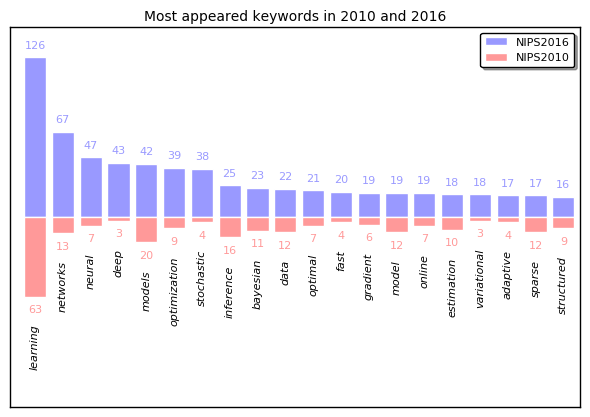

In [22]:
n = len(df_new) #20
X = np.arange(n)
x_name = df_new['words']
x_name=x_name.tolist()

Y1 =  df_new['count_2016'] # (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = df_new['count_2010'] # (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y1/120, facecolor='#9999ff', edgecolor='white', label='NIPS2016')
plt.bar(X, -1*Y2/120, facecolor='#ff9999', edgecolor='white', label='NIPS2010')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y/120 + 0.05, '%.0f' % y, ha='center', va= 'bottom', size=8, color='#9999ff')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y/120 - 0.05, '%.0f' % y, ha='center', va= 'top', size=8,color='#ff9999')
    
for x, y, name in zip(X, Y2, x_name):
    plt.text(x + 0.4, -y/120 - 0.23, name, ha='center', size=8,rotation = 90, color='black', style='oblique')

plt.legend ( loc="upper right", fontsize=8,shadow=True,fancybox=True)


plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())
plt.title('Most appeared keywords in 2010 and 2016',size=10)

([], <a list of 0 Text yticklabel objects>)

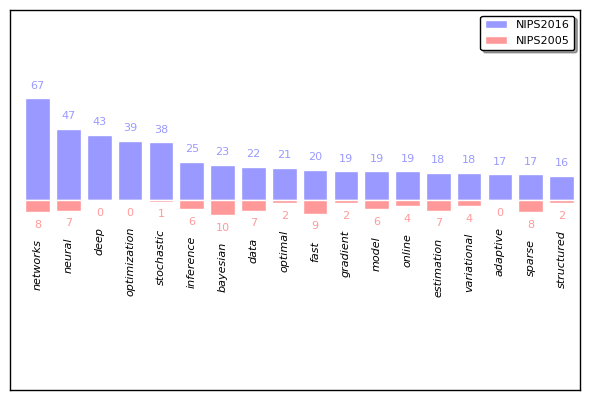

In [16]:
## Except 'learning' and 'model'

df_new = pd.merge(df_y_2016, df_y_2005, on='words', how='outer')

df_new = df_new[(df_new['words']!='learning') & (df_new['words']!='models')]

df_new = df_new.ix[:19]

df_new=df_new.fillna(0)

df_new

#Y1 =df_new['count_2016']
#Y1.head()

n = len(df_new) #20
X = np.arange(n)
x_name = df_new['words']
x_name=x_name.tolist()

Y1 =df_new['count_2016'] # (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 =df_new['count_2005'] # (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y1/100, facecolor='#9999ff', edgecolor='white', label='NIPS2016')
plt.bar(X, -1*Y2/100, facecolor='#ff9999', edgecolor='white', label='NIPS2005')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y/100 + 0.05, '%.0f' % y, ha='center', va= 'bottom', size=8, color='#9999ff')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y/100 - 0.05, '%.0f' % y, ha='center', va= 'top', size=8,color='#ff9999')
    
for x, y, name in zip(X, Y2, x_name):
    plt.text(x + 0.4, -y/100 - 0.23, name, ha='center', size=8,rotation = 90, color='black', style='oblique')

plt.legend ( loc="upper right", fontsize=8,shadow=True,fancybox=True)


plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())